In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('db/personal_transactions.csv')
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [27]:
df['Amount'].sum()

220353.54

In [28]:
print(df['Date'].min())
print(df['Date'].max())


01/01/2018
12/29/2018


In [29]:
print(f"Number of categories: {df["Category"].nunique()}")
print(f"Categories: {df["Category"].unique()}")

Number of categories: 22
Categories: ['Shopping' 'Mortgage & Rent' 'Restaurants' 'Credit Card Payment'
 'Movies & DVDs' 'Home Improvement' 'Utilities' 'Music' 'Mobile Phone'
 'Gas & Fuel' 'Groceries' 'Paycheck' 'Fast Food' 'Coffee Shops' 'Internet'
 'Haircut' 'Alcohol & Bars' 'Auto Insurance' 'Entertainment'
 'Food & Dining' 'Television' 'Electronics & Software']


In [30]:
mapping = {
    'Restaurants': 'Food & Dining',
    'Fast Food': 'Food & Dining',
    'Coffee Shops': 'Food & Dining',
    'Alcohol & Bars': 'Food & Dining',
    'Food & Dining': 'Food & Dining',
    
    'Movies & DVDs': 'Entertainment',
    'Music': 'Entertainment',
    'Entertainment': 'Entertainment',
    'Television': 'Entertainment',
    
    'Shopping': 'Shopping & Services',
    'Home Improvement': 'Shopping & Services',
    'Haircut': 'Shopping & Services',
    'Electronics & Software': 'Shopping & Services',
    'Mobile Phone': 'Shopping & Services',
    'Internet': 'Shopping & Services',
    
    'Mortgage & Rent': 'Housing & Utilities',
    'Utilities': 'Housing & Utilities',
    'Gas & Fuel': 'Housing & Utilities',
    'Auto Insurance': 'Housing & Utilities',
    'Credit Card Payment': 'Housing & Utilities',
    'Paycheck': 'Housing & Utilities',
    
    'Groceries': 'Groceries'
}
df['Category'] = df['Category'].replace(mapping)


In [31]:
print("Number of categories:", df['Category'].nunique())
print("Categories:", df['Category'].unique())

Number of categories: 5
Categories: ['Shopping & Services' 'Housing & Utilities' 'Food & Dining'
 'Entertainment' 'Groceries']


In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = df['Category'].unique()
sizes = df.groupby('Category')['Amount'].sum()


[561.08, 3676.07, 2795.21, 187906.79, 25414.39]


In [36]:
dict(zip(labels,sizes))

{'Shopping & Services': 561.08,
 'Housing & Utilities': 3676.07,
 'Food & Dining': 2795.21,
 'Entertainment': 187906.79,
 'Groceries': 25414.39}

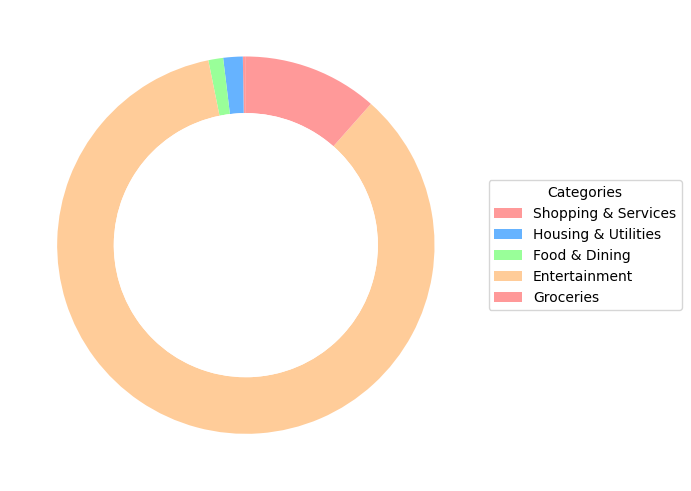

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops={'width': 0.3},
    autopct=lambda pct:'',
    pctdistance=0.85,  # Adjusts percentage position just inside outer edge
    labels=[''] * len(labels),  # Remove text labels here
    textprops={'fontsize': 10}
)

# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Add legend instead of labels to avoid clutter
ax.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()